In [48]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pickle
from scipy.signal import savgol_filter
from queue import Queue

In [93]:
data = pickle.load(open('shaping_2020_02_05_04_43_18.pkl', 'rb'))
data = pickle.load(open('shaping_2020_02_05_05_16_58.pkl', 'rb'))

In [94]:
shaped_data = data['shaped']['val_returns']
unshaped_data = data['unshaped']['val_returns']
shaped_time = data['shaped']['time'].mean(axis=0)
unshaped_time = data['unshaped']['time'].mean(axis=0)
shaped_values = data['shaped']['Q'].max(axis=2).mean()
unshaped_values = data['unshaped']['Q'].max(axis=2).mean()

In [99]:
data['shaped']['Q'].max(axis=2).mean()

61.95948257826951

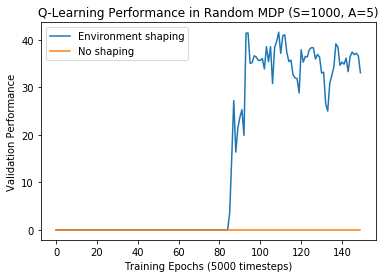

In [96]:
# plt.plot(savgol_filter(shaped_data, 21, 3), label='shaped')
# plt.plot(savgol_filter(unshaped_data, 21, 3), label='unshaped')
plt.plot(shaped_data.sum(axis=2).mean(axis=0), label='Environment shaping')
plt.plot(unshaped_data.sum(axis=2).mean(axis=0), label='No shaping')
plt.legend()
plt.title('Q-Learning Performance in Random MDP (S=1000, A=5)')
plt.xlabel('Training Epochs (5000 timesteps)')
plt.ylabel('Validation Performance')
plt.show()

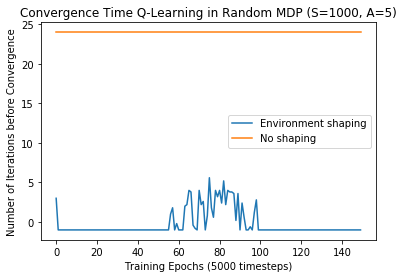

In [97]:
plt.plot(shaped_time, label='Environment shaping')
plt.plot(unshaped_time, label='No shaping')
plt.legend()
plt.title('Convergence Time Q-Learning in Random MDP (S=1000, A=5)')
plt.xlabel('Training Epochs (5000 timesteps)')
plt.ylabel('Number of Iterations before Convergence')
plt.show()

In [98]:
print(unshaped_time)

[24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24.
 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24.
 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24.
 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24.
 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24.
 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24.
 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24.
 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24.
 24. 24. 24. 24. 24. 24.]


In [ ]:
shaped_values, unshaped_values

In [45]:
def bfs(T, start):
    """
    :param T: 3-dim np.ndarray, deterministic transition matrix indexed by (S, A, S'), basically the graph
    :param start: int, 0-indexed start state
    :return: 1-dim np.ndarray, list of distances to each state, or inf if not reachable from START
    """
    nS, nA = T.shape[:2]

    visited = set()
    visited.add(start)
    queue = Queue(nS)
    queue.put(start)
    distances = np.full(nS, np.inf)
    distances[start] = 0
    while not queue.empty():
        s = queue.get()
        # iterate over states reachable from s
        for nexts in np.nonzero(T[s])[1]:
            if nexts not in visited:
                visited.add(nexts)
                queue.put(nexts)
                distances[nexts] = distances[s] + 1
    return distances


In [50]:
dists = bfs(data['mdp']['transition'], 0)
print(f'Number of states: {np.count_nonzero(dists < np.inf)}')

Number of states: 975
